## Final Project GEOL 787
## Connor Smith

In [218]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from IPython.display import display, clear_output #To generate movie 
from IPython.display import Image #To display image
%matplotlib inline

## Abstract
The purpose of this jupyter noteboook is to produce synthetic data of a simpliefed geothermal exploration model and establish a method to represent data as positive and negative training examples fit to train and test a CNN predictive model. Synthetic training data that is randomized or simulates the causative bodies of geophysical and geologic features might either collocate for a geothermal target and/or represent negative potential. The synthetic training data code is designed to generate 3 channels that simulate mapping/exploration elements of a geothermal exploration model where an overlapping high (channel 1) is plotted as a smoothly decaying ellipsoid, a halo type structure (channel 2) is plotted as a smoothly decaying ring, and a coincident geologic structure (channel 3) is plotted as a discrete polygon. 
    

![title](GTCollocation.png) 
        
(From Craig, 2018, Collocated intersecting (A) gravity gradients, (B) magnetic-low, (C) low-resistivity, 2-m temperature anomaly,and (D) favorable oriented faults for slip and dilation)

### Motivation/Intro
The motivation for this method comes from Granek, 2016, synthetic data set of a porphyry intrusion to train a CNN. 
    
![title](TDex.png) 

      (From Granek, 2016, synthetic modeling of a porphyry intrusion)
      
Recent developments and successes in machine learning, using convolution nueral networks (CNN) hold promise for improving geothermal favorability mapping. The CNN is a deep learning machine learning model commonly employed for computer vision tasks involving image segmentation, identification, and anomaly detection. A CNN may be able to apply predictions to geothermal data that help to resolve subtle patterns or linkages between datasets associated with favorable structural settings for geothermal activity and subsurface geothermal upwellings. Before being applied to geologic and geophysical data, a CNN approach might benefit from initailly testing it on multi-modal synthetic data that is designed to represent the simplified geothermal exploration problem of identifying collocated structures.
  
Machine learning tasks are commonly divided into supervised and supervised categories, where supervised learning uses prior knowledge of the perceived output values. The task of predicting collocated structures with a CNN model is considered a supervised learning approach, thus positive training examples are defined as samples where the structures in all 3 channels overlap, while neagtive training examples represent examples where the structures do not overlap. 

### Methods

Generating contour plot channels

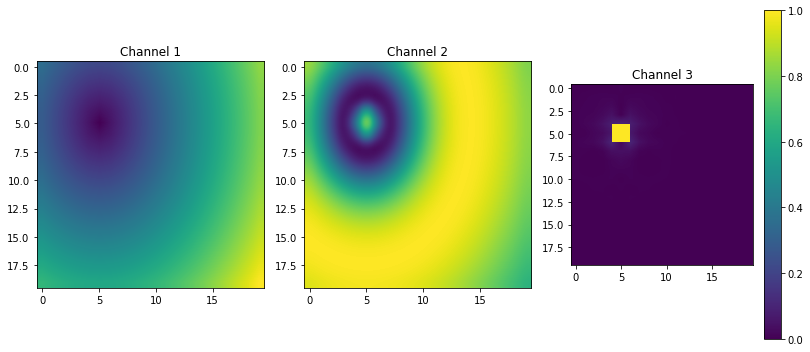

In [219]:
#This block of code creates three subplots of the example of the three channels, using the Ipython display they are
#each plotted N # of times with random (yet constrained) origins and dimensions

# Option to fix random state for reproducibility
#np.random.seed(3) # test if the same # combinations occur 

N= 30 # the number of iterations 

x_start, x_end = -20,20  #-2.0, 2.0
y_start, y_end = -20,20  #-1.0, 1.0
X = np.linspace(x_start, x_end, 20)
Y = np.linspace(y_start, y_end, 20)
x, y = np.meshgrid(X, Y) # Meshgrid to evaluate functions on

u=np.random.uniform(x_start,x_end,N)# changes x-position of the center
v=np.random.uniform(y_start,y_end,N) # changes y-position of the center

a=np.random.uniform(0.1,0.5,N) #changes dimensions on the x-axis
b=np.random.uniform(0.1,0.5,N) #changes dimensions  on the y-axis 

 

fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5)) 
#iterate over loop to generate sub plot movies
for i in range(0,N,1):
    plt.subplot(141)
    plt.imshow(np.sqrt(a[i]*(x-u[i])**2 + b[i]*(y-v[i])**2),interpolation='bilinear') #magnitude x^2+y^2
    plt.title('Channel 1')

    plt.subplot(142)
    plt.imshow(-np.sin(2*np.log(np.sqrt(a[i]*(x-u[i])**2 + b[i]*(y-v[i])**2))),interpolation='quadric') 
    plt.title('Channel 2')
    
    plt.subplot(143)
    plt.imshow(np.abs(np.cos((x-u[i])**2 + (y-v[i])**2) / ((x-u[i])**2 + (y-v[i])**2)),interpolation='bilinear')
    plt.title('Channel 3')
    plt.gca().set_aspect('equal')
    
    display(fig) 
    clear_output(wait=True)
plt.clim(0, 1) #This is a manual setting, actual magnitude can be adjusted in equations      
plt.colorbar()
plt.tight_layout()


Plotted above: overlapping high (channel 1) is plotted as a smoothly decaying ellipsoid, a halo type structure (channel 2) is plotted as a smoothly decaying ring, and a coincident geologic structure (channel 3) is plotted as a discrete polygon.

Channel 3's position acts as the model constraint on where to evaluate the collective magnitude value of the 3 channels. Because of this when the channels are overlapping adding up their collective values will produce a value somewhere in the range of [0.9 to 1.9] and when they are not we can expect values that are greater or less than this range. 

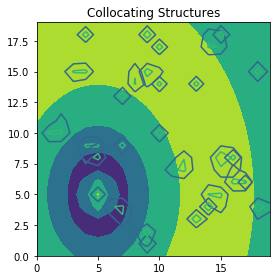

In [220]:
fig, ax = plt.subplots()
for i in range(0,N,1):
    c1=ax.contourf((np.hypot(x-u[i], y-v[i])),interpolation='bilinear') #np.sqrt(a[i]*(x-u[i])**2 + b[i]*(y-v[i])**2),2) #,interpolation='bilinear')

    c2=ax.contourf(-np.sin(2*np.log(np.sqrt(a[i]*(x-u[i])**2 + b[i]*(y-v[i])**2))),2,interpolation='quadric')
    
    c3=ax.contour(np.abs(np.cos((x-u[i])**2 + (y-v[i])**2) / ((x-u[i])**2 + (y-v[i])**2)),2,interpolation='bilinear')
   
    plt.gca().set_aspect('equal')
    plt.title('Collocating Structures')
    display(fig) 
    clear_output(wait=True)

plt.tight_layout()

Randomizing data, exporting to PNG

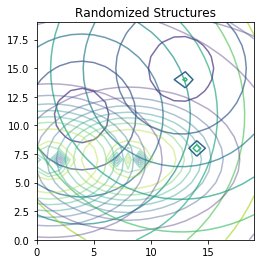

In [221]:
N=2

u=np.random.uniform(-20,20,N)#x-position of the center
v=np.random.uniform(-20,20,N) #y-position of the center

m=np.random.uniform(x_start,x_end,N) #new random element
n=np.random.uniform(y_start,y_end,N) #new random element
q=np.random.uniform(x_start,x_end,N) #new random element
p=np.random.uniform(y_start,y_end,N) #new random element

a=np.random.uniform(0.1,0.5,N) #radius on the x-axis
b=np.random.uniform(0.1,0.5,N) #radius on the y-axis 



fig, ax = plt.subplots()
for i in range(0,N,1):
    z1=np.hypot(x-u[i], y-v[i])
    c1=ax.contour(z1,alpha=0.7)
    
    z2=np.sin(2*np.log(np.sqrt(a[i]*(x-m[i])**2 + b[i]*(y-n[i])**2)))
    c2=ax.contour(z2,alpha=0.4)
    
    z3=np.abs(np.cos(2*np.pi*(x-p[i])**2 + (y-q[i])**2) / ((x-p[i])**2 + (y-q[i])**2))
    c3=ax.contour(z3,2,)
    
    plt.gca().set_aspect('equal')
    plt.title('Randomized Structures')
    display(fig) 
    clear_output(wait=True)
    
    #fig.savefig('ExPlot' + str(i)+ '.png') # This saves a png for each value from 0 to N
    

Part 3) Add conditional labels to each plot

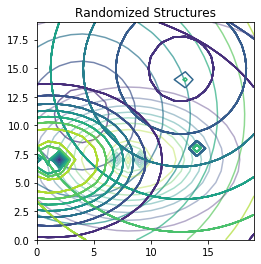

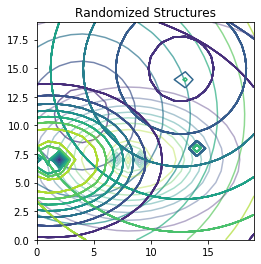

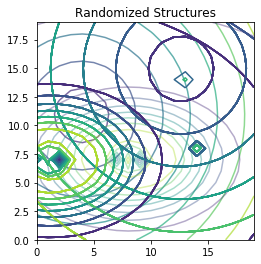

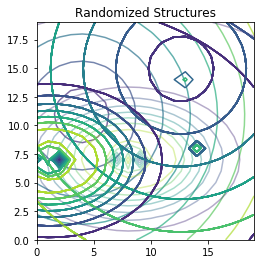

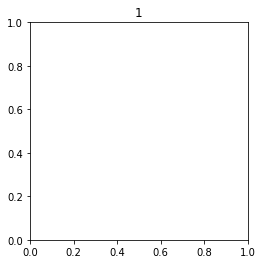

In [236]:
N=4
for i in range(0,N,1):
    c1=ax.contour(z1,alpha=0.7)
    c2=ax.contour(z2,alpha=0.4)    
    c3=ax.contour(z3,2)
    added = z1[i]+z2[i]
    if (np.where(added[i]<= 0.9 and z3[i]+added[i] < 1.9)):
        plt.title('1')
    else:
         plt.title('0')   
    plt.gca().set_aspect('equal')
    display(fig) 
    #clear_output(wait=True)    

### Challenges

refining the functions that set up contours and
establishing a conditional statement to determine labels on the plots.

## References 

Craig, J.W., 2018, Discovery and analysis of a blind geothermal system in southeastern Gabbs Valley, western Nevada [M.S.Thesis]: University of Nevada, Reno, p. 1-111
    
Granek, J., 2016, Application of machine learning algorithms to mineral prospectivity mapping [Ph.D. Thesis]:. University of British Columbia, p.xxxx, doi: https://open.library.ubc.ca/collections/ubctheses/24/items/1.0340340    